## **Packages**

In [1]:
# packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import date, datetime
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from hdfs import InsecureClient
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

/tmp/ipykernel_84159/1866876166.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# matplotlib 한글폰트 
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    rc('font', family='D2Coding')
       
# rc('font', family='NanumGothic') # 나눔폰트 사용시

In [3]:
# python과 mysql 연결을 위한 필요모듈 패키지
# !pip install pymysql
import pymysql

## **DW DB계정 생성**

### 📍DB 계정 생성 (mysql)

In [ ]:
# mysql에서 진행

## mysql 실행
# service mysql start
# mysql -u root (docker) / sudo mysql -u root -p (aws)

## user 생성
# mysql> create user bigMysql@'%' identified by 'bigMysql1234@';
# mysql> grant all privileges on *.* to bigMysql@'%' with grant option;

## 사용할 database 생성
# mysql> create database if not exists etlmysql;
# mysql> show databases;

### 📍 DB 계정/서버 정보 (JDBC)

In [4]:
JDBC = {
      'url':'jdbc:mysql://localhost:3306/etlmysql?characterEncoding=utf8&serverTimezone=Asia/Seoul'
     ,'props':{
      'user':'bigMysql',
      'password':'bigMysql1234@'   
      }
}

## **DW에 Data 저장**
- travel_data_preprocessed.csv : 전처리 완료한 관광지 정보 데이터
    - 'DW_2_Transform' 파일에 전처리 완료해놨음 

In [5]:
travel_data = spark.read.json('/dw_data/travel_data_preprocessed.json', encoding='utf-8')

In [6]:
travel_data.show(2)
travel_data.printSchema()

+-----+----------------------------------+--------+--------+-----------+------------+--------------------+----------+-------------+------------+-----------------------+---------+----------------+--------------------------+--------+--------+------+--------+---------------------------------+---------+---------------------------------+------+--------+----------+----------+
|index|                              개요|개장기간|공연시간|관광지 분류|관람소요시간|                명칭|      분류|     상세정보|      쉬는날|애완동물 동반 가능 여부| 우편번호|유모차 대여 여부|                  이용시간|이용시기|이용요금|입장료|전화번호|                             주소| 주차시설|                         주차요금|  지역|체험안내|행사시작일|행사종료일|
+-----+----------------------------------+--------+--------+-----------+------------+--------------------+----------+-------------+------------+-----------------------+---------+----------------+--------------------------+--------+--------+------+--------+---------------------------------+---------+---------------------------------+------+--------+--

In [7]:
JDBC

{'url': 'jdbc:mysql://localhost:3306/etlmysql?characterEncoding=utf8&serverTimezone=Asia/Seoul',
 'props': {'user': 'bigMysql', 'password': 'bigMysql1234@'}}

In [8]:
# write.mode('overwrite') = 기존 테이블 있으면 해당 테이블에 새로 저장되는 레코드로 덮어쓰기
# url = db주소 (JDBC['url'])
# table = 테이블명
# properties = 계정 등 연결 정보 (JDBC['props'])
travel_data.write.mode('overwrite').jdbc(url=JDBC['url'], table='OVERALL',properties=JDBC['props'])

In [9]:
# Table 잘 생성되었는지 mysql 에서 확인
# mysql > use etlmysql;
# mysql > show tables; 

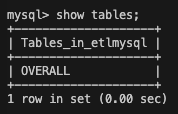